<a href="https://colab.research.google.com/github/nixfield/google-colab/blob/master/klasifikasi_emosi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

tweet_df = pd.read_csv('https://raw.githubusercontent.com/virgantara/sundanese-twitter-dataset/master/newdataset.csv')
tweet_df.head()

,label,data
0,anger,"sok geura leungit atuh sia teh corona, matak g..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ..."


label
joy        637
anger      628
sadness    627
fear       626
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


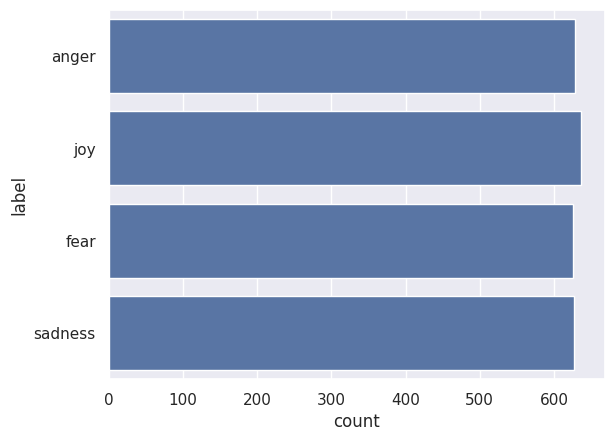

In [9]:
import seaborn as sns
print(tweet_df['label'].value_counts())
print('\n')
print(sns.countplot(tweet_df['label']))

In [15]:
import re
df =tweet_df.copy()

# Case Folding
def caseFolding(data):
    temp_tweet = []
    for tw in data:
        # remove @name(mention)
        tw = re.sub(r"(?:\@|https?\://)\S+", "", tw)

        # remove links
        # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
        tw = re.sub(r"http\S+", "", tw)

        # remove new line
        tw = re.sub('\n', '', tw)

        # remove RT
        tw = re.sub('RT', '', tw)

        # remove punctuations and numbers
        tw = re.sub("[^a-zA-Z^']", " ", tw)
        tw = re.sub(" {2,}", " ", tw)

        # remove leading and trailing whitespace
        tw = tw.strip()

        # remove whitespace with a single space
        tw = re.sub(r'\s+', ' ', tw)

        # text to lowercase
        tw = tw.lower();
        temp_tweet.append(tw)
    return temp_tweet

df['Case Folding']=caseFolding(df['data'])
df.head()

,label,data,Case Folding
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...


In [23]:
import requests

# stopword removal
def removeStopWords(data):
  stop_words = requests.get('https://raw.githubusercontent.com/virgantara/sundanese-twitter-dataset/master/stopwordv1.txt').text.splitlines()
  print(stop_words, "\n")
  return data.apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))


df['Stopword Remove']=removeStopWords(df['Case Folding'])
df.head()

['tapi', 'sanajan', 'salain', 'ti', 'ku', 'kituna', 'sabalikna', 'malah', 'saenggeus', 'kitu', 'boh', 'lain', 'bae', 'duka', 'rek', 'bari', 'lantaran', 'asal', 'dina', 'siga', 'keur', 'saha', 'eukeur', 'wae', 'atuh', 'kawas', 'lamun', 'erek', 'isuk', 'beurang', 'peuting', 'kamari', 'wanci', 'burit', 'tengah', 'teuing', 'apal', 'buleud', 'taneuh', 'kulon', 'wetan', 'kaler', 'kidul', 'keur', 'saha', 'naon', 'mana', 'naha', 'iraha', 'kumaha', 'sabaraha', 'ieu', 'eta', 'dieu', 'kieu', 'jeung', 'sareng', 'nepi', 'jaba', 'lian', 'lamun', 'tapi', 'atawa', 'atanapi', 'tuluy', 'terus', 'teras', 'yen', 'majar', 'nu', 'anu', 'matak', 'majar', 'teh', 'mah', 'seug', 'heug', 'mun', 'ketah', 'ketang', 'pisan', 'sok', 'be', 'wae', 'we', 'weh', 'mung', 'ngan', 'ukur', 'keur', 'nuju', 'masih', 'keneh', 'pikeun', 'kanggo', 'da', 'kapan', 'kapanan', 'apan', 'pan', 'apanan', 'deui', 'deuih', 'ge', 'oge', 'ongkoh', 'nya', 'nyah', 'enya', 'lain', 'sanes', 'abi', 'euy', 'dan', 'na', 'ari', 'sama', 'ka', 'ku',

,label,data,Case Folding,Stopword Remove
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...,geura leungit sia corona gelo yeuh aing unggal...
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna,katoel katuhu nyerina kenca goblog wasitna
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...,bingah patepang pangerasa sing katampi kalayan...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...,hariwang lalakon hirup nyorangan
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...,orang sih anying sampis bunuh ae bunuh


In [24]:
import nltk
nltk.download('punkt')

# tokenizing
def tokenized(data):
  return data.apply(nltk.word_tokenize)

df['Tokenizing']=tokenized(df['Stopword Remove'])
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,label,data,Case Folding,Stopword Remove,Tokenizing
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...,geura leungit sia corona gelo yeuh aing unggal...,"[geura, leungit, sia, corona, gelo, yeuh, aing..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna,katoel katuhu nyerina kenca goblog wasitna,"[katoel, katuhu, nyerina, kenca, goblog, wasitna]"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...,bingah patepang pangerasa sing katampi kalayan...,"[bingah, patepang, pangerasa, sing, katampi, k..."
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...,hariwang lalakon hirup nyorangan,"[hariwang, lalakon, hirup, nyorangan]"
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...,orang sih anying sampis bunuh ae bunuh,"[orang, sih, anying, sampis, bunuh, ae, bunuh]"


In [26]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# stemming
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(tweet) for tweet in data]


df['Stemming'] = df['Tokenizing'].apply(stemming)
df.head()

,label,data,Case Folding,Stopword Remove,Tokenizing,Stemming
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...,geura leungit sia corona gelo yeuh aing unggal...,"[geura, leungit, sia, corona, gelo, yeuh, aing...","[geura, leungit, sia, corona, gelo, yeuh, aing..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna,katoel katuhu nyerina kenca goblog wasitna,"[katoel, katuhu, nyerina, kenca, goblog, wasitna]","[katoel, katuhu, nyerina, kenca, goblog, wasitna]"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...,bingah patepang pangerasa sing katampi kalayan...,"[bingah, patepang, pangerasa, sing, katampi, k...","[bingah, patepang, pangerasa, sing, katampi, k..."
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...,hariwang lalakon hirup nyorangan,"[hariwang, lalakon, hirup, nyorangan]","[hariwang, lalakon, hirup, nyorangan]"
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...,orang sih anying sampis bunuh ae bunuh,"[orang, sih, anying, sampis, bunuh, ae, bunuh]","[orang, sih, anying, sampis, bunuh, ae, bunuh]"


In [37]:
df.head(10)

,label,data,Case Folding,Stopword Remove,Tokenizing,Stemming
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...,geura leungit sia corona gelo yeuh aing unggal...,"[geura, leungit, sia, corona, gelo, yeuh, aing...","[geura, leungit, sia, corona, gelo, yeuh, aing..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna,katoel katuhu nyerina kenca goblog wasitna,"[katoel, katuhu, nyerina, kenca, goblog, wasitna]","[katoel, katuhu, nyerina, kenca, goblog, wasitna]"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...,bingah patepang pangerasa sing katampi kalayan...,"[bingah, patepang, pangerasa, sing, katampi, k...","[bingah, patepang, pangerasa, sing, katampi, k..."
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...,hariwang lalakon hirup nyorangan,"[hariwang, lalakon, hirup, nyorangan]","[hariwang, lalakon, hirup, nyorangan]"
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...,orang sih anying sampis bunuh ae bunuh,"[orang, sih, anying, sampis, bunuh, ae, bunuh]","[orang, sih, anying, sampis, bunuh, ae, bunuh]"
5,sadness,nya prihatin siih tp kedah kitu at pak Bozz ha...,nya prihatin siih tp kedah kitu at pak bozz ha...,prihatin siih tp kedah at pak bozz hapuntn tos...,"[prihatin, siih, tp, kedah, at, pak, bozz, hap...","[prihatin, siih, tp, kedah, at, pak, bozz, hap..."
6,joy,sae nya kang ai tos ningal kompak kitu teh bin...,sae nya kang ai tos ningal kompak kitu teh bin...,sae ai tos ningal kompak bingah ningal nage d ...,"[sae, ai, tos, ningal, kompak, bingah, ningal,...","[sae, ai, tos, ningal, kompak, bingah, ningal,..."
7,sadness,"Cai soca ngeclak mun emut kana dosa, rumasa ra...",cai soca ngeclak mun emut kana dosa rumasa rag...,cai soca ngeclak emut kana dosa rumasa raga la...,"[cai, soca, ngeclak, emut, kana, dosa, rumasa,...","[cai, soca, ngeclak, emut, kana, dosa, rumasa,..."
8,anger,"Gokar! Punteun, buat yg masih pd nongkrong yg ...",gokar punteun buat yg masih pd nongkrong yg ma...,gokar punteun yg pd nongkrong yg jalan gajelas...,"[gokar, punteun, yg, pd, nongkrong, yg, jalan,...","[gokar, punteun, yg, pd, nongkrong, yg, jalan,..."
9,anger,kumah pernahnya naik angkot dari Cihampelas tr...,kumah pernahnya naik angkot dari cihampelas tr...,kumah pernahnya naik angkot cihampelas trs tur...,"[kumah, pernahnya, naik, angkot, cihampelas, t...","[mah, pernah, naik, angkot, cihampelas, trs, t..."
